In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorize

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
import pickle

In [ ]:
#Place raw files movies_metadata.csv, links,csv, keywords.csv and credits.csv and the same location as your notebook
%cd /content/drive/MyDrive/nyp_project

/content/drive/MyDrive/nyp_project


# 1. Cleaning raw files to get final features


### 1a. movies_metadata.csv

In [ ]:
movies_metadata = pd.read_csv('movies_metadata.csv')
movies_metadata.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies_metadata.id

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45466, dtype: object

In [ ]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
movies_metadata.loc[movies_metadata.id.duplicated(),:]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,9.09129,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,"[{'name': 'Fida cinematografica', 'id': 73}, {...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",1.96799,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,"[{'name': 'Filmfour', 'id': 6705}]","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
12066,False,NaN,1600000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.bubblethefilm.com/,14788,tt0454792,en,Bubble,Set against the backdrop of a decaying Midwest...,3.0083,/w56oo9nREcF54sNXVYuE9QxZFjT.jpg,"[{'name': 'Magnolia Pictures', 'id': 1030}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2005-09-03,0.0,73.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Bubble,False,6.4,36.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
15074,False,NaN,4,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,22649,tt0022879,en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,2.41119,/k0MF0IIbJ2PfOIku2KyraXL72d8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1932-12-08,25.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every woman who has loved will understand,A Farewell to Arms,False,6.2,29.0
15765,False,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,13209,tt0499537,fa,Offside,"Since women are banned from soccer matches, Ir...",1.52988,/nfkOkpudNNIjRrf0mTFVoiGzHyc.jpg,"[{'name': 'Jafar Panahi Film Productions', 'id...","[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2006-05-26,0.0,93.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Offside,False,6.7,27.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
20843,False,NaN,40000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,77221,tt1701210,en,Black Gold,"On the Arabian Peninsula in the 1930s, two war...",6.47567,/iQd7zWhSeCe3cgdPcLIDXjGfdzL.jpg,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2011-12-21,5446000.0,130.0,"[{'iso_6

In [ ]:
movies_metadata.loc[movies_metadata.id == '105045' ,:]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
676,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0


In [ ]:
movies_metadata.drop_duplicates(subset=['id'], inplace = True)
movies_metadata.shape

(45436, 24)

### 1b. links.csv

In [ ]:
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.shape

(45843, 3)

In [ ]:
links.tmdbId

0           862.0
1          8844.0
2         15602.0
3         31357.0
4         11862.0
           ...   
45838    439050.0
45839    111109.0
45840     67758.0
45841    227506.0
45842    461257.0
Name: tmdbId, Length: 45843, dtype: float64

In [ ]:
links.loc[links.tmdbId.duplicated(keep=False),:]

,movieId,imdbId,tmdbId
140,142,94878,NaN
598,604,115978,NaN
678,690,111613,105045.0
708,720,118114,NaN
709,721,114103,NaN
...,...,...,...
40391,162632,2818654,298721.0
40629,163246,127834,97995.0
45197,174533,235679,10991.0
45202,174543,287635,12600.0


In [ ]:
links.loc[links.tmdbId == 265189.0 ,:]

,movieId,imdbId,tmdbId
24448,114342,3630276,265189.0
45641,175813,2121382,265189.0


In [ ]:
links.loc[links.tmdbId == 12600.0 ,:]

,movieId,imdbId,tmdbId
5574,5672,313487,12600.0
45202,174543,287635,12600.0


In [ ]:
movies_metadata.loc[movies_metadata.id == '265189',:]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
24164,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,265189,tt2121382,sv,Turist,"While holidaying in the French Alps, a Swedish...",12.1657,/rGMtc9AtZsnWSSL5VnLaGvx1PI6.jpg,"[{'name': 'Motlys', 'id': 2783}, {'name': 'Cop...","[{'iso_3166_1': 'NO', 'name': 'Norway'}, {'iso...",2014-08-15,1359497.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0


In [ ]:
movies_metadata.loc[movies_metadata.id == '12600' ,:]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5535,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",7.0723,/bqL0PVHbQ8Jmw3Njcl38kW0CoeM.jpg,[],"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0


In [ ]:
links.drop_duplicates(subset = ['tmdbId'], keep = False, inplace = True)
links.shape

(45565, 3)

In [ ]:
links.tmdbId = links.tmdbId.astype(float)
links.tmdbId = links.tmdbId.astype(int)
links.tmdbId = links.tmdbId.astype(str)
links.tmdbId 

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45838    439050
45839    111109
45840     67758
45841    227506
45842    461257
Name: tmdbId, Length: 45565, dtype: object

In [ ]:
movies_metadata.id = movies_metadata.id.astype(str)
movies_metadata.id

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45436, dtype: object

### 1c. keywords.csv

In [ ]:
keywords = pd.read_csv('keywords.csv')
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords.id = keywords.id.astype(int)
keywords.id = keywords.id.astype(str)
keywords.id

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
46414    439050
46415    111109
46416     67758
46417    227506
46418    461257
Name: id, Length: 46419, dtype: object

In [ ]:
keywords.loc[keywords.id.duplicated(keep=False),:]

,id,keywords
676,105045,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
838,132641,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
949,22649,"[{'id': 131, 'name': 'italy'}, {'id': 428, 'na..."
1465,105045,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
2564,84198,"[{'id': 187056, 'name': 'woman director'}]"
...,...,...
40994,298721,"[{'id': 1227, 'name': 'cemetery'}, {'id': 1261..."
41230,97995,[]
45774,10991,"[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
45779,12600,"[{'id': 9663, 'name': 'sequel'}, {'id': 11451,..."


In [ ]:
keywords.loc[keywords.id == '105045',:]

,id,keywords
676,105045,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
1465,105045,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."


In [ ]:
keywords.loc[keywords.id == '132641',:]

,id,keywords
838,132641,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
29999,132641,"[{'id': 818, 'name': 'based on novel'}, {'id':..."


In [ ]:
keywords.drop_duplicates(subset = ['id'], keep = 'first', inplace = True)
keywords.shape

(45432, 2)

### 1d. credits.csv

In [ ]:
credits= pd.read_csv('credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
credits.id = credits.id.astype(int)
credits.id = credits.id.astype(str)
credits.id

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45471    439050
45472    111109
45473     67758
45474    227506
45475    461257
Name: id, Length: 45476, dtype: object

In [ ]:
credits.loc[credits.id.duplicated(keep=False),:]

,cast,crew,id
676,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...",105045
838,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '52fe4b9ac3a368484e190d25', 'de...",132641
949,"[{'cast_id': 1, 'character': 'Catherine Barkle...","[{'credit_id': '56d73d3e9251414291002436', 'de...",22649
1465,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...",105045
2564,"[{'cast_id': 3, 'character': 'Himself', 'credi...","[{'credit_id': '52fe48e09251416c9109b347', 'de...",84198
...,...,...,...
40051,"[{'cast_id': 1, 'character': 'Jenjira', 'credi...","[{'credit_id': '5739ceeac3a3683c9d000c12', 'de...",298721
40287,"[{'cast_id': 1001, 'character': 'Max.', 'credi...","[{'credit_id': '55140dfa92514103e9002d99', 'de...",97995
44831,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de...",10991
44836,"[{'cast_id': 1, 'character': 'Ash Ketchum (voi...","[{'credit_id': '52fe45049251416c75048e35', 'de...",12600


In [ ]:
credits.loc[credits.id == '105045',:]

,cast,crew,id
676,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...",105045
1465,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de...",105045


In [ ]:
credits.loc[credits.id == '132641',:]

,cast,crew,id
838,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '52fe4b9ac3a368484e190d25', 'de...",132641
30013,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '56365ed9925141285701b06e', 'de...",132641


In [ ]:
credits.drop_duplicates(subset = ['id'], keep = 'first', inplace = True)
credits.shape

(45432, 3)

### 1e. Merge 1a, 1b, 1c, 1d - Raw movie features

In [ ]:
#This merge only includes rows with the same key in both datasets
moviesmetadata_links = pd.merge(movies_metadata, links, left_on='id', right_on='tmdbId')
moviesmetadata_links_keywords = pd.merge(moviesmetadata_links, keywords, left_on='id', right_on='id')
moviesmetadata_links_keywords_credits = pd.merge(moviesmetadata_links_keywords, credits, left_on='id', right_on='id')
movies_df = moviesmetadata_links_keywords_credits.copy()
movies_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,imdbId,tmdbId,keywords,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,114709,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,113497,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,113228,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,114885,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,113041,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45398,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"

### 1f. EDA - Raw movie features
We look at each of the 30 columns in movies_df to decide the final movie features to utilise


In [ ]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40918
budget                       0
genres                       0
homepage                 37634
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25012
title                        3
video                        3
vote_average                 3
vote_count                   3
movieId                      0
imdbId                       0
tmdbId                       0
keywords                     0
cast                         0
crew                         0
dtype: int64

In [ ]:
# 1st column: adult (not useful)
movies_df.adult.describe()

count     45403
unique        2
top       False
freq      45394
Name: adult, dtype: object

In [ ]:
# Not useful - 99.9% of data in a one category
pd.concat([movies_df.adult.value_counts().to_frame(), movies_df.adult.value_counts(normalize=True).to_frame()], axis=1)

,adult,adult
False,45394,0.999802
True,9,0.000198


In [ ]:
# 2nd column: belongs_to_collection
movies_df.belongs_to_collection.describe()

count                                                  4485
unique                                                 1695
top       {'id': 415931, 'name': 'The Bowery Boys', 'pos...
freq                                                     29
Name: belongs_to_collection, dtype: object

In [ ]:
pd.concat([movies_df.belongs_to_collection.value_counts().to_frame(), movies_df.belongs_to_collection.value_counts(normalize=True).to_frame()], axis=1)

,belongs_to_collection,belongs_to_collection
"{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}",29,0.006466
"{'id': 421566, 'name': 'Totò Collection', 'poster_path': '/4ayJsjC3djGwU9eCWUokdBWvdLC.jpg', 'backdrop_path': '/jaUuprubvAxXLAY5hUfrNjxccUh.jpg'}",27,0.006020
"{'id': 96887, 'name': 'Zatôichi: The Blind Swordsman', 'poster_path': '/8Q31DAtmFJjhFTwQGXghBUCgWK2.jpg', 'backdrop_path': '/bY8gLImMR5Pr9PaG3ZpobfaAQ8N.jpg'}",26,0.005797
"{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}",26,0.005797
"{'id': 37261, 'name': 'The Carry On Collection', 'poster_path': '/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg', 'backdrop_path': '/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg'}",25,0.005574
...,...,...
"{'id': 149191, 'name': 'Lady Snowblood Collection', 'poster_path': '/d7ztUEeUpp3mGrD5xoLpi4sH8ad.jpg', 'backdrop_path': None}",1,0.000223
"{'id': 362554, 'name': 'Ex Collection', 'poster_path': None, 'backdrop_path': None}",1,0.000223
"{'id': 403001, 'name': 'Meu Passado me Condena', 'poster_path': None, 'backdrop_path': None}",1,0.000223
"{'id': 468551, 'name': 'Justice League Collection', 'poster_path': None, 'backdrop_path': '/vyxOJuk6cxrRcGzuMRbDTpwji1w.jpg'}",1,0.000223


In [ ]:
# Change to 1 or 0
movies_df.loc[~movies_df['belongs_to_collection'].isnull(),'belongs_to_collection'] = 1  # not nan
movies_df.loc[movies_df['belongs_to_collection'].isnull(),'belongs_to_collection'] = 0   # nan

pd.concat([movies_df.belongs_to_collection.value_counts().to_frame(), movies_df.belongs_to_collection.value_counts(normalize=True).to_frame()], axis=1)

,belongs_to_collection,belongs_to_collection
0,40918,0.901218
1,4485,0.098782


In [ ]:
# 3rd column: budget (80% of movies have budget filled as "0". Numeric raw feature with too many "0", not used as final feature)
movies_df.budget.describe()

count     45403
unique     1222
top           0
freq      36533
Name: budget, dtype: object

In [ ]:
pd.concat([movies_df.budget.value_counts().to_frame(), movies_df.budget.value_counts(normalize=True).to_frame()], axis=1)

,budget,budget
0,36533,0.804638
5000000,286,0.006299
10000000,257,0.005660
20000000,243,0.005352
2000000,242,0.005330
...,...,...
305177,1,0.000022
27440000,1,0.000022
106000,1,0.000022
1821052,1,0.000022


In [ ]:
movies_df.budget = pd.to_numeric(movies_df.budget, errors='coerce')

In [ ]:
#Change all cells with 0 as the budget to NaN
movies_df.loc[movies_df['budget'] == 0,'budget'] = np.nan

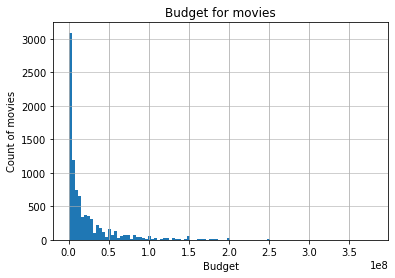

In [ ]:
movies_df.budget.plot.hist(grid=True, bins=100)
plt.title('Budget for movies')
plt.xlabel('Budget')
plt.ylabel('Count of movies')
plt.grid(axis='y', alpha=0.75)

In [ ]:
movies_df.budget.describe()

count    8.870000e+03
mean     2.162411e+07
std      3.434049e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [ ]:
# 4th column: genre
movies_df.genres.describe()

count                             45403
unique                             4060
top       [{'id': 18, 'name': 'Drama'}]
freq                               4992
Name: genres, dtype: object

In [ ]:
pd.concat([movies_df.genres.value_counts().to_frame(), movies_df.genres.value_counts(normalize=True).to_frame()], axis=1)

,genres,genres
"[{'id': 18, 'name': 'Drama'}]",4992,0.109949
"[{'id': 35, 'name': 'Comedy'}]",3619,0.079708
"[{'id': 99, 'name': 'Documentary'}]",2719,0.059886
[],2441,0.053763
"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",1299,0.028610
...,...,...
"[{'id': 99, 'name': 'Documentary'}, {'id': 14, 'name': 'Fantasy'}]",1,0.000022
"[{'id': 10749, 'name': 'Romance'}, {'id': 27, 'name': 'Horror'}, {'id': 35, 'name': 'Comedy'}, {'id': 53, 'name': 'Thriller'}]",1,0.000022
"[{'id': 878, 'name': 'Science Fiction'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}, {'id': 10402, 'name': 'Music'}]",1,0.000022
"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}, {'id': 10770, 'name': 'TV Movie'}]",1,0.000022


In [ ]:
# 5th column: homepage 
movies_df.homepage.describe()

count                            7769
unique                           7665
top       http://www.georgecarlin.com
freq                               12
Name: homepage, dtype: object

In [ ]:
pd.concat([movies_df.homepage.value_counts().to_frame(), movies_df.homepage.value_counts(normalize=True).to_frame()], axis=1)

,homepage,homepage
http://www.georgecarlin.com,12,0.001545
http://www.wernerherzog.com/films-by.html,7,0.000901
http://breakblade.jp/,6,0.000772
http://www.crownintlpictures.com/actitles.html,4,0.000515
http://www.thehungergames.movie/,4,0.000515
...,...,...
http://www.nickbroomfield.com/biggieandtupac.html,1,0.000129
http://www.jadetiger.com/talesfromthescript/index.html,1,0.000129
http://www.hallmarkchannel.com/karen-kingsburys-the-bridge,1,0.000129
http://shinjukuincident.emp.hk/,1,0.000129


In [ ]:
# Change to 1 or 0
movies_df.loc[~movies_df['homepage'].isnull(),'homepage'] = 1  
movies_df.loc[movies_df['homepage'].isnull(),'homepage'] = 0  
pd.concat([movies_df.homepage.value_counts().to_frame(), movies_df.homepage.value_counts(normalize=True).to_frame()], axis=1)

,homepage,homepage
0,37634,0.828888
1,7769,0.171112


In [ ]:
# 6th column: id (not required as feature) 
# 7th column: imdb_id (not required as feature)

In [ ]:
# 8th column: original_language           
movies_df.original_language.describe()

count     45392
unique       89
top          en
freq      32233
Name: original_language, dtype: object

In [ ]:
pd.set_option("display.max_rows", None)
pd.concat([movies_df.original_language.value_counts().to_frame(), movies_df.original_language.value_counts(normalize=True).to_frame()], axis=1)

,original_language,original_language
en,32233,0.710103
fr,2434,0.053622
it,1529,0.033684
ja,1344,0.029609
de,1078,0.023749
es,993,0.021876
ru,826,0.018197
hi,508,0.011191
ko,444,0.009781
zh,409,0.009010


In [ ]:
pd.set_option("display.max_rows", 10)

In [ ]:
# Get list of original_language that have less than 200 rows for that category
temp_series = movies_df['original_language'].value_counts() < 200
temp_list = list(temp_series[temp_series].index)
temp_list[:5]

['tr', 'cs', 'el', 'no', 'hu']

In [ ]:
# For original_language that have less than 200 rows for that category, we change cells to a single string "original_language_infrequent"
movies_df.loc[movies_df['original_language'].isin(temp_list) ,'original_language'] = 'original_language_infrequent'
pd.concat([movies_df.original_language.value_counts().to_frame(), movies_df.original_language.value_counts(normalize=True).to_frame()], axis=1)

,original_language,original_language
en,32233,0.710103
fr,2434,0.053622
original_language_infrequent,1599,0.035226
it,1529,0.033684
ja,1344,0.029609
...,...,...
cn,313,0.006895
fi,294,0.006477
nl,248,0.005464
da,223,0.004913


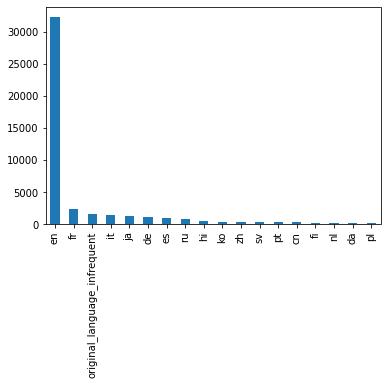

In [ ]:
movies_df['original_language'].value_counts().plot(kind='bar')

In [ ]:
# 9th column: original_title
# 21st column: title
movies_df_title_comparison = movies_df.loc[:, ['original_title', 'title']]
movies_df_title_comparison

,original_title,title
0,Toy Story,Toy Story
1,Jumanji,Jumanji
2,Grumpier Old Men,Grumpier Old Men
3,Waiting to Exhale,Waiting to Exhale
4,Father of the Bride Part II,Father of the Bride Part II
...,...,...
45398,رگ خواب,Subdue
45399,Siglo ng Pagluluwal,Century of Birthing
45400,Betrayal,Betrayal
45401,Satana likuyushchiy,Satan Triumphant


In [ ]:
for index, row in movies_df_title_comparison.iterrows():
  movies_df_title_comparison.loc[index,'same_title'] = row.original_title	== row.title	
movies_df_title_comparison.loc[movies_df_title_comparison.same_title == False]

,original_title,title,same_title
28,La Cité des Enfants Perdus,The City of Lost Children,False
29,摇啊摇，摇到外婆桥,Shanghai Triad,False
32,"Guillaumet, les ailes du courage",Wings of Courage,False
57,Il postino,The Postman,False
58,Le confessionnal,The Confessional,False
...,...,...,...
45390,Maa,Mom,False
45392,San Michele aveva un gallo,St. Michael Had a Rooster,False
45398,رگ خواب,Subdue,False
45399,Siglo ng Pagluluwal,Century of Birthing,False


In [ ]:
for index, row in movies_df.iterrows():
  if row.original_title	== row.title:
    movies_df.loc[index,'same_title'] = 1
  else:
    movies_df.loc[index,'same_title'] = 0
pd.concat([movies_df.same_title.value_counts().to_frame(), movies_df.same_title.value_counts(normalize=True).to_frame()], axis=1)

,same_title,same_title
1.0,34020,0.74929
0.0,11383,0.25071


In [ ]:
# 10th column: overview 
movies_df.overview.describe()

count                  44449
unique                 44277
top       No overview found.
freq                     133
Name: overview, dtype: object

In [ ]:
pd.concat([movies_df.overview.value_counts().to_frame(), movies_df.overview.value_counts(normalize=True).to_frame()], axis=1)

,overview,overview
No overview found.,133,0.002992
No Overview,7,0.000157
,5,0.000112
No movie overview available.,3,0.000067
A few funny little novels about different aspects of life.,3,0.000067
...,...,...
"Ten easy steps show you how to make money from drugs, featuring a series of interviews with drug dealers, prison employees, and lobbyists arguing for tougher drug laws.",1,0.000022
"In Ireland, American lawyer Ingrid Jessner and her activist partner, Paul Sullivan, struggle to uncover atrocities committed by the British government against the Northern Irish during the ""Troubles."" But when Sullivan is assassinated in the streets, Jessner teams up with Peter Kerrigan, a British investigator acting against the will of his own government, and struggles to uncover a conspiracy that may even implicate one of Kerrigan's colleagues.",1,0.000022
"Andre Braugher stars as Nick Atwater, the leader of a robbery crew balancing his personal life with the planning of a major heist. The crew is being targeted by a relentless cop and the Chinese mafia every step of the way, while Atwater struggles at home with his teenage stepdaughter (Mae Whitman).",1,0.000022
An office worker is trapped inside the building where a killer is on the loose.,1,0.000022


In [ ]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import corpus
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
stemmer = SnowballStemmer(language='english')
stops = set(stopwords.words('english'))

#Function that returns a tokenized and stemmed copy of a document for words not in stop words
def stem_tokenize_removestop(document):
    tokens = word_tokenize(document)
    return [stemmer.stem(t) for t in tokens if t.isalpha() and t.lower() not in stops] 


print(stem_tokenize_removestop('A tough judge takes in a FOSTER child with nowhere to go. Attempts to REUNITE child with long lost father end badly with the rebellious child running away.'))

['tough', 'judg', 'take', 'foster', 'child', 'nowher', 'go', 'attempt', 'reunit', 'child', 'long', 'lost', 'father', 'end', 'bad', 'rebelli', 'child', 'run', 'away']


In [ ]:
#  Change 'No overview found.', 'No Overview' to empty string
movies_df.loc[movies_df.overview == 'No overview found.', 'overview'] = ""
movies_df.loc[movies_df.overview == 'No Overview', 'overview'] = ""

movies_df.loc[movies_df.overview == '', 'overview'].head()

104     
799     
969     
1609    
2226    
Name: overview, dtype: object

In [ ]:
movies_df['overview_cleaned'] = movies_df.overview.apply(lambda x: stem_tokenize_removestop(str(x)))
movies_df[['overview_cleaned']].head()

,overview_cleaned
0,"[led, woodi, andi, toy, live, happili, room, a..."
1,"[sibl, judi, peter, discov, enchant, board, ga..."
2,"[famili, wed, reignit, ancient, feud, neighbor..."
3,"[cheat, mistreat, step, women, hold, breath, w..."
4,"[georg, bank, recov, daughter, wed, receiv, ne..."


In [ ]:
#Formatting data in overview_cleaned
def create_soup2(x):
    return ' '.join(x['overview_cleaned'])
movies_df['overview_cleaned'] = movies_df.apply(create_soup2, axis=1)

In [ ]:
movies_df['overview_cleaned']

0        led woodi andi toy live happili room andi birt...
1        sibl judi peter discov enchant board game open...
2        famili wed reignit ancient feud neighbor fish ...
3        cheat mistreat step women hold breath wait elu...
4        georg bank recov daughter wed receiv news preg...
                               ...                        
45398                                  rise fall man woman
45399    artist struggl finish work storylin cult play ...
45400    one hit goe wrong profession assassin end suit...
45401    small town live two brother one minist one hun...
45402    year decriminalis homosexu uk director daisi a...
Name: overview_cleaned, Length: 45403, dtype: object

In [ ]:
# 11th column: popularity (not used, varied)
movies_df.popularity.describe()

count     45400
unique    44129
top         0.0
freq         34
Name: popularity, dtype: object

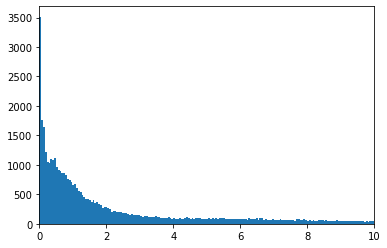

In [ ]:
movies_df.popularity = pd.to_numeric(movies_df.popularity, errors='coerce')
plt.hist(movies_df.popularity, bins=10000)
plt.xlim(0, 10)
plt.show()

In [ ]:
# 12th column: poster_path (not used)
movies_df.poster_path.describe()

count                                45017
unique                               44991
top       /5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg
freq                                     5
Name: poster_path, dtype: object

In [ ]:
pd.concat([movies_df.poster_path.value_counts().to_frame(), movies_df.poster_path.value_counts(normalize=True).to_frame()], axis=1)

,poster_path,poster_path
/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,5,0.000111
/qW1oQlOHizRHXZQrpkimYr0oxzn.jpg,4,0.000089
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg,4,0.000089
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg,3,0.000067
/5LiahdmMdeMrB2YP1HuU3O7Qt3b.jpg,2,0.000044
...,...,...
/6z3FpMU03F9mTuNu1YIQrsVFFTL.jpg,1,0.000022
/wj3qr7hAgBK4mKuwitCmY96cTdI.jpg,1,0.000022
/1bRLuRffx6OUUOA341Nry80HU73.jpg,1,0.000022
/4xwbrUNgcWEYf3utF6dDSL1CAy0.jpg,1,0.000022


In [ ]:
# 13th column: production_companies 
movies_df.production_companies.describe()

count     45400
unique    22689
top          []
freq      11860
Name: production_companies, dtype: object

In [ ]:
pd.concat([movies_df.production_companies.value_counts().to_frame(), movies_df.production_companies.value_counts(normalize=True).to_frame()], axis=1)

,production_companies,production_companies
[],11860,0.261233
"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]",742,0.016344
"[{'name': 'Warner Bros.', 'id': 6194}]",540,0.011894
"[{'name': 'Paramount Pictures', 'id': 4}]",503,0.011079
"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]",439,0.009670
...,...,...
"[{'name': 'Vision Associates Productions', 'id': 44751}, {'name': 'Lisa and David Company', 'id': 44752}]",1,0.000022
"[{'name': 'Arachnid Productions Ltd.', 'id': 56482}]",1,0.000022
"[{'name': 'Atlas Entertainment', 'id': 507}, {'name': 'Mosaic Media Group', 'id': 748}, {'name': 'Omnilab Media', 'id': 2729}, {'name': 'Relativity Media', 'id': 7295}, {'name': 'Skyline (Baker St)', 'id': 37774}]",1,0.000022
"[{'name': 'Paradise Films', 'id': 10645}, {'name': 'Amka Films Productions', 'id': 71818}, {'name': 'Dulciné Films', 'id': 81974}]",1,0.000022


In [ ]:
# 14th column: production_countries
movies_df.production_countries.describe()

count                                                 45400
unique                                                 2385
top       [{'iso_3166_1': 'US', 'name': 'United States o...
freq                                                  17831
Name: production_countries, dtype: object

In [ ]:
pd.concat([movies_df.production_countries.value_counts().to_frame(), movies_df.production_countries.value_counts(normalize=True).to_frame()], axis=1)

,production_countries,production_countries
"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",17831,0.392753
[],6275,0.138216
"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2238,0.049295
"[{'iso_3166_1': 'FR', 'name': 'France'}]",1652,0.036388
"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",1352,0.029780
...,...,...
"[{'iso_3166_1': 'IN', 'name': 'India'}, {'iso_3166_1': 'CH', 'name': 'Switzerland'}]",1,0.000022
"[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_3166_1': 'AR', 'name': 'Argentina'}]",1,0.000022
"[{'iso_3166_1': 'TZ', 'name': 'Tanzania'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",1,0.000022
"[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'DE', 'name': 'Germany'}]",1,0.000022


In [ ]:
# 15th column: release_date (not used)
movies_df.release_date.describe()

count          45316
unique         17324
top       2008-01-01
freq             136
Name: release_date, dtype: object

In [ ]:

pd.concat([movies_df.release_date.value_counts().to_frame(), movies_df.release_date.value_counts(normalize=True).to_frame()], axis=1)

,release_date,release_date
2008-01-01,136,0.003001
2009-01-01,121,0.002670
2007-01-01,116,0.002560
2005-01-01,111,0.002449
2006-01-01,101,0.002229
...,...,...
1993-02-20,1,0.000022
1966-02-11,1,0.000022
1926-06-06,1,0.000022
1947-09-22,1,0.000022


In [ ]:
# 16th column: revenue (not used)
movies_df.revenue.describe()

count    4.540000e+04
mean     1.121642e+07
std      6.437203e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [ ]:
pd.concat([movies_df.revenue.value_counts().to_frame(), movies_df.revenue.value_counts(normalize=True).to_frame()], axis=1)

,revenue,revenue
0.0,38012,0.837269
12000000.0,20,0.000441
10000000.0,19,0.000419
11000000.0,19,0.000419
2000000.0,18,0.000396
...,...,...
12212123.0,1,0.000022
8203235.0,1,0.000022
25900.0,1,0.000022
414404.0,1,0.000022


In [ ]:
# 17th column: runtime 
movies_df.runtime.describe()

count    45143.000000
mean        94.122788
std         38.420780
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [ ]:
pd.concat([movies_df.runtime.value_counts().to_frame(), movies_df.runtime.value_counts(normalize=True).to_frame()], axis=1)

,runtime,runtime
90.0,2554,0.056576
0.0,1557,0.034490
100.0,1470,0.032563
95.0,1410,0.031234
93.0,1210,0.026804
...,...,...
238.0,1,0.000022
316.0,1,0.000022
258.0,1,0.000022
780.0,1,0.000022


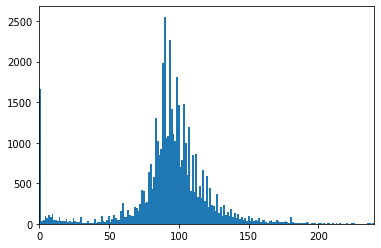

In [ ]:
plt.hist(movies_df.runtime, bins=1000)
plt.xlim(0, 240)
plt.show()

In [ ]:
movies_df.runtime = movies_df.runtime.fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
movies_df['runtime_scaled'] = scaler.fit_transform(movies_df[["runtime"]])
movies_df.loc[:,['runtime', 'runtime_scaled']]

,runtime,runtime_scaled
0,81.0,-0.322968
1,104.0,0.267336
2,101.0,0.190340
3,127.0,0.857640
4,106.0,0.318667
...,...,...
45398,90.0,-0.091980
45399,360.0,6.837680
45400,90.0,-0.091980
45401,87.0,-0.168976


In [ ]:
movies_df.runtime.isnull().sum()

0

In [ ]:
# 18th column: spoken_languages (seems similar to original_language feature, not used)
movies_df.spoken_languages.describe()

count                                        45400
unique                                        1930
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                         22367
Name: spoken_languages, dtype: object

In [ ]:
pd.concat([movies_df.spoken_languages.value_counts().to_frame(), movies_df.spoken_languages.value_counts(normalize=True).to_frame()], axis=1)

,spoken_languages,spoken_languages
"[{'iso_639_1': 'en', 'name': 'English'}]",22367,0.492665
[],3824,0.084229
"[{'iso_639_1': 'fr', 'name': 'Français'}]",1849,0.040727
"[{'iso_639_1': 'ja', 'name': '日本語'}]",1285,0.028304
"[{'iso_639_1': 'it', 'name': 'Italiano'}]",1218,0.026828
...,...,...
"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'id', 'name': 'Bahasa indonesia'}]",1,0.000022
"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso_639_1': 'es', 'name': 'Español'}, {'iso_639_1': 'tn', 'name': ''}]",1,0.000022
"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'is', 'name': 'Íslenska'}, {'iso_639_1': 'it', 'name': 'Italiano'}]",1,0.000022
"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'es', 'name': 'Español'}]",1,0.000022


In [ ]:
# 19th column: status (not used)
movies_df.status.describe()

count        45319
unique           6
top       Released
freq         44956
Name: status, dtype: object

In [ ]:
pd.concat([movies_df.status.value_counts().to_frame(), movies_df.status.value_counts(normalize=True).to_frame()], axis=1)

,status,status
Released,44956,0.991990
Rumored,228,0.005031
Post Production,98,0.002162
In Production,20,0.000441
Planned,15,0.000331
Canceled,2,0.000044


In [ ]:
# 20th column: tagline (not used)
movies_df.tagline.describe()

count                      20391
unique                     20273
top       Based on a true story.
freq                           7
Name: tagline, dtype: object

In [ ]:
pd.concat([movies_df.tagline.value_counts().to_frame(), movies_df.tagline.value_counts(normalize=True).to_frame()], axis=1)

,tagline,tagline
Based on a true story.,7,0.000343
Be careful what you wish for.,4,0.000196
-,4,0.000196
Trust no one.,4,0.000196
How far would you go?,3,0.000147
...,...,...
Imagine that.,1,0.000049
A diabolical quartet of HORRIFYING Evil!,1,0.000049
AMAZING! TIMELY! THRILLING!,1,0.000049
We did it for Alvin!,1,0.000049


In [ ]:
# 21st column: title (not used)
movies_df.title.describe()

count          45400
unique         42253
top       Cinderella
freq              11
Name: title, dtype: object

In [ ]:
pd.concat([movies_df.title.value_counts().to_frame(), movies_df.title.value_counts(normalize=True).to_frame()], axis=1)

,title,title
Cinderella,11,0.000242
Alice in Wonderland,9,0.000198
Hamlet,9,0.000198
Les Misérables,8,0.000176
Beauty and the Beast,8,0.000176
...,...,...
Piranha Hunt,1,0.000022
Arthur Newman,1,0.000022
Niagara Motel,1,0.000022
Union Square,1,0.000022


In [ ]:
# 22nd column: video (99% of cells are of 1 feature, not useful)
movies_df.video.describe()

count     45400
unique        2
top       False
freq      45307
Name: video, dtype: object

In [ ]:
pd.concat([movies_df.video.value_counts().to_frame(), movies_df.video.value_counts(normalize=True).to_frame()], axis=1)

,video,video
False,45307,0.997952
True,93,0.002048


In [ ]:
# 23rd column: vote_average (not used)
movies_df.vote_average.describe()

count    45400.000000
mean         5.618599
std          1.923888
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [ ]:
pd.concat([movies_df.vote_average.value_counts().to_frame(), movies_df.vote_average.value_counts(normalize=True).to_frame()], axis=1)

,vote_average,vote_average
0.0,2991,0.065881
6.0,2466,0.054317
5.0,1993,0.043899
7.0,1884,0.041498
6.5,1722,0.037930
...,...,...
9.4,3,0.000066
9.8,1,0.000022
0.7,1,0.000022
9.6,1,0.000022


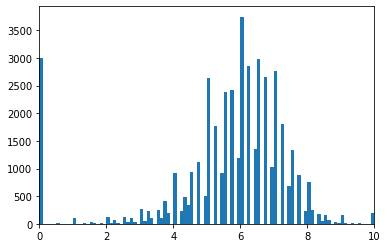

In [ ]:
plt.hist(movies_df.vote_average, bins=100)
plt.xlim(0, 10)
plt.show()

In [ ]:
# 24th column: vote_count (not used)
movies_df.vote_count.describe()

count    45400.000000
mean       109.974802
std        491.622435
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [ ]:
pd.concat([movies_df.vote_count.value_counts().to_frame(), movies_df.vote_count.value_counts(normalize=True).to_frame()], axis=1)

,vote_count,vote_count
1.0,3260,0.071806
2.0,3132,0.068987
0.0,2892,0.063700
3.0,2778,0.061189
4.0,2478,0.054581
...,...,...
4461.0,1,0.000022
1085.0,1,0.000022
1539.0,1,0.000022
2487.0,1,0.000022


In [ ]:
# 25th, 26th and 27th columns are movieId, imdbId, tmdbId

In [ ]:
# 28th column: keywords
movies_df.video.describe()

count     45400
unique        2
top       False
freq      45307
Name: video, dtype: object

In [ ]:
pd.concat([movies_df.keywords.value_counts().to_frame(), movies_df.keywords.value_counts(normalize=True).to_frame()], axis=1)

,keywords,keywords
[],14329,0.315596
"[{'id': 187056, 'name': 'woman director'}]",1280,0.028192
"[{'id': 10183, 'name': 'independent film'}]",505,0.011123
"[{'id': 9716, 'name': 'stand-up comedy'}]",233,0.005132
"[{'id': 4344, 'name': 'musical'}]",168,0.003700
...,...,...
"[{'id': 570, 'name': 'rape'}, {'id': 8087, 'name': 'horror'}, {'id': 14819, 'name': 'violence'}, {'id': 189921, 'name': 'video nasty'}, {'id': 197619, 'name': 'foreign'}]",1,0.000022
"[{'id': 1741, 'name': 'blindness and impaired vision'}, {'id': 5490, 'name': 'girlfriend'}, {'id': 5625, 'name': 'relationship problems'}]",1,0.000022
"[{'id': 437, 'name': 'painter'}, {'id': 1233, 'name': 'composer'}, {'id': 5565, 'name': 'biography'}, {'id': 10183, 'name': 'independent film'}]",1,0.000022
"[{'id': 657, 'name': 'fire'}, {'id': 801, 'name': 'bounty hunter'}, {'id': 1366, 'name': 'shotgun'}, {'id': 2284, 'name': 'horseback riding'}, {'id': 2673, 'name': 'horse'}, {'id': 3623, 'name': 'cabin'}, {'id': 9454, 'name': 'frontier'}, {'id': 9503, 'name': 'outlaw'}, {'id': 9897, 'name': 'rifle'}, {'id': 10048, 'name': 'unrequited love'}, {'id': 10201, 'name': 'death of father'}, {'id': 10322, 'name': 'native american'}, {'id': 10950, 'name': 'shootout'}, {'id': 11112, 'name': 'search'}, {'id': 13132, 'name': 'pistol'}, {'id': 14540, 'name': 'death by accident'}, {'id': 14819, 'name': 'violence'}, {'id': 14985, 'name': 'ireland'}, {'id': 15111, 'name': 'drinking'}, {'id': 15290, 'name': 'pursuit'}, {'id': 157471, 'name': 'shot through a wall'}, {'id': 158145, 'name': 'flaming arrow'}, {'id': 160840, 'name': 'dream sequence'}, {'id': 187844, 'name': 'flashback'}, {'id': 222133, 'name': 'shot in the heart'}]",1,0.000022


In [ ]:
# 29th column: cast
movies_df.video.describe()

count     45400
unique        2
top       False
freq      45307
Name: video, dtype: object

In [ ]:
pd.concat([movies_df.cast.value_counts().to_frame(), movies_df.cast.value_counts(normalize=True).to_frame()], axis=1).head(4)

cast      cast
[]                                                  2413  0.053146
[{'cast_id': 10, 'character': 'Dominik', 'credi...     1  0.000022
[{'cast_id': 9, 'character': 'Diego Mora', 'cre...     1  0.000022
[{'cast_id': 1, 'character': 'Adult Colin Crave...     1  0.000022

In [ ]:
# 30th column: crew
movies_df.crew.describe()

count     45403
unique    44633
top          []
freq        771
Name: crew, dtype: object

In [ ]:
pd.concat([movies_df.crew.value_counts().to_frame(), movies_df.crew.value_counts(normalize=True).to_frame()], axis=1).head(4)

,crew,crew
[],771,0.016981
"[{'credit_id': '52fe4950c3a36847f8193df1', 'department': 'Directing', 'gender': 2, 'id': 45982, 'job': 'Director', 'name': 'Alberto Sordi', 'profile_path': '/qfrgQ551SxM2i4LMIFLX7kScUc7.jpg'}]",1,0.000022
"[{'credit_id': '52fe4952c3a36847f8194305', 'department': 'Directing', 'gender': 2, 'id': 134639, 'job': 'Director', 'name': 'Jim Goddard', 'profile_path': None}, {'credit_id': '52fe4952c3a36847f819430b', 'department': 'Writing', 'gender': 2, 'id': 100981, 'job': 'Writer', 'name': 'John Kohn', 'profile_path': None}, {'credit_id': '52fe4952c3a36847f8194311', 'department': 'Writing', 'gender': 0, 'id': 228992, 'job': 'Writer', 'name': 'Robert Bentley', 'profile_path': None}]",1,0.000022
"[{'credit_id': '52fe43e99251416c75022c4d', 'department': 'Editing', 'gender': 2, 'id': 5821, 'job': 'Editor', 'name': 'Eugenio Alabiso', 'profile_path': None}, {'credit_id': '52fe43e99251416c75022c3b', 'department': 'Sound', 'gender': 0, 'id': 18836, 'job': 'Original Music Composer', 'name': 'Guido De Angelis', 'profile_path': None}, {'credit_id': '52fe43e99251416c75022c41', 'department': 'Sound', 'gender': 0, 'id': 18837, 'job': 'Original Music Composer', 'name': 'Maurizio De Angelis', 'profile_path': None}, {'credit_id': '52fe43e99251416c75022c23', 'department': 'Directing', 'gender': 1, 'id': 33806, 'job': 'Director', 'name': 'Michele Lupo', 'profile_path': None}, {'credit_id': '52fe43e99251416c75022c29', 'department': 'Writing', 'gender': 0, 'id': 51421, 'job': 'Screenplay', 'name': 'Marcello Fondato', 'profile_path': None}, {'credit_id': '52fe43e99251416c75022c2f', 'department': 'Writing', 'gender': 0, 'id': 25319, 'job': 'Screenplay', 'name': 'Francesco Scardamaglia', 'profile_path': None}, {'credit_id': '52fe43e99251416c75022c35', 'department': 'Production', 'gender': 0, 'id': 25320, 'job': 'Producer', 'name': 'Elio Scardamaglia', 'profile_path': None}, {'credit_id': '52fe43e99251416c75022c47', 'department': 'Camera', 'gender': 0, 'id': 66641, 'job': 'Director of Photography', 'name': 'Franco Di Giacomo', 'profile_path': None}]",1,0.000022


### 1g. ratings.csv

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
ratings.movieId = ratings.movieId.astype(int)
ratings.movieId = ratings.movieId.astype(str)
ratings.movieId

0             110
1             147
2             858
3            1221
4            1246
            ...  
26024284    58559
26024285    60069
26024286    63082
26024287    64957
26024288    71878
Name: movieId, Length: 26024289, dtype: object

In [ ]:
#No users rated the same movie multiple times
ratings.loc[ratings.duplicated(subset=['userId','movieId'], keep=False),:]

,userId,movieId,rating,timestamp


### 1h. Further cleaning text raw movie features

In [ ]:
movies_df2 = movies_df.copy()

In [ ]:
text_columns = ['genres', 'production_companies', 'production_countries', 'keywords','cast', 'crew']
movies_df2.loc[:,text_columns].head()

,genres,production_companies,production_countries,keywords,cast,crew
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [ ]:
#literal_eval helps Python applications to process trees of the Python abstract syntax grammar, and safely evaluate an expression node or a string containing a Python literal or container display.
from ast import literal_eval

#Function that does a literal_eval on the input, returns empty list if there are any malformed strings
def literal_eval_helper(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        print(e)
        return [] 

In [ ]:
#Literal eval on column 'production_companies_cleaned'
#There are 3 malformed strings in column 'production_companies_cleaned'
movies_df2['production_companies_cleaned'] = movies_df2.production_companies.apply(lambda x: literal_eval_helper(x))  

malformed node or string: <_ast.Name object at 0x7f4bfbac45d0>
malformed node or string: <_ast.Name object at 0x7f4bfb2992d0>
malformed node or string: <_ast.Name object at 0x7f4bfae80f90>


In [ ]:
#Literal eval on column 'production_countries_cleaned'
#There are 3 malformed strings in column 'production_countries_cleaned'
movies_df2['production_countries_cleaned'] = movies_df2.production_countries.apply(lambda x: literal_eval_helper(x))   

malformed node or string: <_ast.Name object at 0x7f4bf9af4810>
malformed node or string: <_ast.Name object at 0x7f4bf94a3ad0>
malformed node or string: <_ast.Name object at 0x7f4bf9146610>


In [ ]:
#Literal eval on columns 'genres', 'keywords','cast', 'crew'
text_columns = ['genres', 'keywords','cast', 'crew']
for column in text_columns:
  movies_df2[column] = movies_df2[column].apply(literal_eval)

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list (whichever is less)
def get_list_3(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #For more than 3 elements, returns first 3 elements. If not, returns all the elements
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of malformed data
    return []

In [ ]:
# Returns the list top 8 elements or entire list (whichever is less)
def get_list_8(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #For more than 3 elements, returns first 8 elements. If not, returns all the elements
        if len(names) > 8:
            names = names[:8]
        return names

    #Return empty list in case of malformed data
    return []

In [ ]:
# Get the director information from the 'crew' raw feature
movies_df2['director'] = movies_df2['crew'].apply(get_director)

#Apply get_list_3 fuction to some columns to get top 3 elements or entire list (whichever is less)
text_columns_top3 = ['cast', 'genres','production_companies_cleaned', 'production_countries_cleaned']
for column in text_columns_top3:
    movies_df2[column] = movies_df2[column].apply(get_list_3)

In [ ]:
#Apply get_list_8 fuction to some columns to get top 8 elements or entire list (whichever is less)
text_columns_top8 = ['keywords']
for column in text_columns_top8:
    movies_df2[column] = movies_df2[column].apply(get_list_8)

In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to features
text_columns = ['cast', 'keywords', 'director', 'genres', 'production_companies_cleaned', 'production_countries_cleaned']

for column in text_columns:
    movies_df2[column] = movies_df2[column].apply(clean_data)

In [ ]:
#Convert original_language column to list format (prepare for subsequent joining of text columns)
movies_df2['original_language'] = movies_df2.original_language.astype(str)

def get_list2(x):
  return [x]
movies_df2['original_language'] = movies_df2['original_language'].apply(get_list2)

movies_df2.loc[:,['original_language']]

,original_language
0,[en]
1,[en]
2,[en]
3,[en]
4,[en]
...,...
45398,[original_language_infrequent]
45399,[original_language_infrequent]
45400,[en]
45401,[en]


In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres']) + ' '.join(x['production_companies_cleaned']) + ' ' + ' '.join(x['production_countries_cleaned'])+ ' '.join(x['original_language'])
movies_df2['soup'] = movies_df2.apply(create_soup, axis=1)

In [ ]:
#Creation of 'soup' text, one of the final movie features, which is created by:
#1. Top 8 keywords 
#2. Top 3 cast
#3. Director
#4. Top 3 genres
#5. Top 3 production companies
#6. Top 3 production countries
#7. original language
movies_df2[['title', 'cast', 'director', 'keywords', 'genres', 'production_companies_cleaned', 'production_countries_cleaned', 'original_language', 'soup']].head(10)

,title,cast,director,keywords,genres,production_companies_cleaned,production_countries_cleaned,original_language,soup
0,Toy Story,"[tomhanks, timallen, donrickles]",johnlasseter,"[jealousy, toy, boy, friendship, friends, riva...","[animation, comedy, family]",[pixaranimationstudios],[unitedstatesofamerica],[en],jealousy toy boy friendship friends rivalry bo...
1,Jumanji,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[boardgame, disappearance, basedonchildren'sbo...","[adventure, fantasy, family]","[tristarpictures, teitlerfilm, interscopecommu...",[unitedstatesofamerica],[en],boardgame disappearance basedonchildren'sbook ...
2,Grumpier Old Men,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[fishing, bestfriend, duringcreditsstinger, ol...","[romance, comedy]","[warnerbros., lancastergate]",[unitedstatesofamerica],[en],fishing bestfriend duringcreditsstinger oldmen...
3,Waiting to Exhale,"[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker,"[basedonnovel, interracialrelationship, single...","[comedy, drama, romance]",[twentiethcenturyfoxfilmcorporation],[unitedstatesofamerica],[en],basedonnovel interracialrelationship singlemot...
4,Father of the Bride Part II,"[stevemartin, dianekeaton, martinshort]",charlesshyer,"[baby, midlifecrisis, confidence, aging, daugh...",[comedy],"[sandollarproductions, touchstonepictures]",[unitedstatesofamerica],[en],baby midlifecrisis confidence aging daughter m...
5,Heat,"[alpacino, robertdeniro, valkilmer]",michaelmann,"[robbery, detective, bank, obsession, chase, s...","[action, crime, drama]","[regencyenterprises, forwardpass, warnerbros.]",[unitedstatesofamerica],[en],robbery detective bank obsession chase shootin...
6,Sabrina,"[harrisonford, juliaormond, gregkinnear]",sydneypollack,"[paris, brotherbrotherrelationship, chauffeur,...","[comedy, romance]","[paramountpictures, scottrudinproductions, mir...","[germany, unitedstatesofamerica]",[en],paris brotherbrotherrelationship chauffeur lon...
7,Tom and Huck,"[jonathantaylorthomas, bradrenfro, rachaelleig...",peterhewitt,[],"[action, adventure, drama]",[waltdisneypictures],[unitedstatesofamerica],[en],jonathantaylorthomas bradrenfro rachaelleighc...
8,Sudden Death,"[jean-claudevandamme, powersboothe, dorianhare...",peterhyams,"[terrorist, hostage, explosive, vicepresident]","[action, adventure, thriller]","[universalpictures, imperialentertainment, sig...",[unitedstatesofamerica],[en],terrorist hostage explosive vicepresident jean...
9,GoldenEye,"[piercebrosnan, seanbean, izabellascorupco]",martincampbell,"[cuba, falselyaccused, secretidentity, compute...","[adventure, action, thriller]","[unitedartists, eonproductions]","[unitedkingdom, unitedstatesofamerica]",[en],cuba falselyaccused secretidentity computervir...


In [ ]:
#Examining a soup
movies_df2.loc[0,'soup']

'jealousy toy boy friendship friends rivalry boynextdoor newtoy tomhanks timallen donrickles johnlasseter animation comedy familypixaranimationstudios unitedstatesofamericaen'

### 1g. Final features

In [ ]:
movies_df2.loc[:,['belongs_to_collection', 'homepage', 'same_title', "runtime_scaled",'soup', 'overview_cleaned']]

,belongs_to_collection,homepage,same_title,runtime_scaled,soup,overview_cleaned
0,1,1,1.0,-0.322968,jealousy toy boy friendship friends rivalry bo...,led woodi andi toy live happili room andi birt...
1,0,0,1.0,0.267336,boardgame disappearance basedonchildren'sbook ...,sibl judi peter discov enchant board game open...
2,1,0,1.0,0.190340,fishing bestfriend duringcreditsstinger oldmen...,famili wed reignit ancient feud neighbor fish ...
3,0,0,1.0,0.857640,basedonnovel interracialrelationship singlemot...,cheat mistreat step women hold breath wait elu...
4,1,0,1.0,0.318667,baby midlifecrisis confidence aging daughter m...,georg bank recov daughter wed receiv news preg...
...,...,...,...,...,...,...
45398,0,1,0.0,-0.091980,tragiclove leilahatami kouroshtahami elhamkord...,rise fall man woman
45399,0,0,0.0,6.837680,artist play pinoy angelaquino perrydizon hazel...,artist struggl finish work storylin cult play ...
45400,0,0,1.0,-0.091980,erikaeleniak adambaldwin juliedupage markl.le...,one hit goe wrong profession assassin end suit...
45401,0,0,0.0,-0.168976,iwanmosschuchin nathalielissenko pavelpavlov ...,small town live two brother one minist one hun...


In [ ]:
movies_df2['belongs_to_collection'] = movies_df2.belongs_to_collection.astype(float)
movies_df2['homepage'] = movies_df2.homepage.astype(float)
movies_df2['same_title'] = movies_df2.same_title.astype(float)
movies_df2['runtime_scaled'] = movies_df2.runtime_scaled.astype(float)

In [ ]:
#1. Creating non_text_features_sparse_matrix 
import scipy
non_text_features_sparse_matrix = scipy.sparse.csr_matrix(movies_df2[['belongs_to_collection', 'homepage', 'same_title', 'runtime_scaled']].copy())
non_text_features_sparse_matrix

<45403x4 sparse matrix of type '<class 'numpy.float64'>'
	with 91677 stored elements in Compressed Sparse Row format>

In [ ]:
type(non_text_features_sparse_matrix)

scipy.sparse.csr.csr_matrix

In [ ]:
non_text_features_sparse_matrix.shape

(45403, 4)

In [ ]:
#2. Create count_matrix from soup
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_df2['soup'])

In [ ]:
type(count_matrix)

scipy.sparse.csr.csr_matrix

In [ ]:
count_matrix.shape

(45403, 111666)

In [ ]:
#As a check, appending all cells in soup column into a list and checking the number of unique words in that list
count_matrix_check_list = []
for index, row in movies_df2.iterrows():
  count_matrix_check_list += row['soup'].split(" ")

print('Number of words in count_matrix_check_list:', len(count_matrix_check_list))
print('Number of unique words in count_matrix_check_list:', len(set(count_matrix_check_list)))

Number of words in count_matrix_check_list: 483096
Number of unique words in count_matrix_check_list: 110013


In [ ]:
count_matrix_check_list[-20010:-20000]

['jasonstatham',
 'dwaynejohnson',
 'f.garygray',
 'action',
 'crime',
 'thrilleruniversalpictures',
 'originalfilm',
 'oneracefilms',
 'unitedstatesofamericaen',
 'friendship']

In [ ]:
#3. Create tfidf_matrix from overview_cleaned

In [ ]:
movies_df2['overview_cleaned'] = movies_df2.overview_cleaned.astype(str)

In [ ]:
movies_df2['overview_cleaned']

0        led woodi andi toy live happili room andi birt...
1        sibl judi peter discov enchant board game open...
2        famili wed reignit ancient feud neighbor fish ...
3        cheat mistreat step women hold breath wait elu...
4        georg bank recov daughter wed receiv news preg...
                               ...                        
45398                                  rise fall man woman
45399    artist struggl finish work storylin cult play ...
45400    one hit goe wrong profession assassin end suit...
45401    small town live two brother one minist one hun...
45402    year decriminalis homosexu uk director daisi a...
Name: overview_cleaned, Length: 45403, dtype: object

In [ ]:
tfidf= TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movies_df2['overview_cleaned'])

In [ ]:
type(tfidf_matrix)

scipy.sparse.csr.csr_matrix

In [ ]:
tfidf_matrix.shape

(45403, 55118)

In [ ]:
#As a check, appending all cells in soup column into a list and checking the number of unique words in that list
tfidf_matrix_check_list = []
for index, row in movies_df2.iterrows():
  tfidf_matrix_check_list += row['overview_cleaned'].split(" ")
print('Number of words in tfidf_matrix_check_list:', len(tfidf_matrix_check_list))
print('Number of unqiue words in tfidf_matrix_check_list:', len(set(tfidf_matrix_check_list)))

Number of words in tfidf_matrix_check_list: 1350138
Number of unqiue words in tfidf_matrix_check_list: 55156


In [ ]:
# hstack non_text_features_sparse_matrix, count_matrix, tfidf_matrix
from scipy.sparse import hstack
features_sparse_matrix = hstack((non_text_features_sparse_matrix, count_matrix, tfidf_matrix))

In [ ]:
features_sparse_matrix.shape

(45403, 166788)

In [ ]:
4 + 111666 + 55118

166788

In [ ]:
features_sparse_matrix

<45403x166788 sparse matrix of type '<class 'numpy.float64'>'
	with 1796053 stored elements in COOrdinate format>

In [ ]:
type(features_sparse_matrix)

scipy.sparse.coo.coo_matrix

In [ ]:
#Convert sparse matrix from coo_matrix to csr_matrix
features_sparse_matrix = features_sparse_matrix.tocsr()
type(features_sparse_matrix)

scipy.sparse.csr.csr_matrix

In [ ]:
features_sparse_matrix.shape

(45403, 166788)

In [ ]:
np.isnan(features_sparse_matrix.data).any()

False

# Content-based recommender

###2a. Cosine similarity

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
#cosine_sim = cosine_similarity(features_sparse_matrix, features_sparse_matrix)

In [ ]:
#https://stackoverflow.com/questions/40900608/cosine-similarity-on-large-sparse-matrix-with-numpy
# Prevent colab from crashing when calculating cosine similarity

def cosine_sim_function(m1, m2, batch_size=10):
    assert m1.shape[1] == m2.shape[1]
    ret = np.ndarray((m1.shape[0], m2.shape[0]))
    for row_i in range(0, int(m1.shape[0] / batch_size) + 1):
        start = row_i * batch_size
        end = min([(row_i + 1) * batch_size, m1.shape[0]])
        if end <= start:
            break # edge cases
        rows = m1[start: end]
        sim = cosine_similarity(rows, m2) 
        ret[start: end] = sim
    return ret

cosine_sim =cosine_sim_function(features_sparse_matrix, features_sparse_matrix)

In [ ]:
# Reset index of movies_df_2 and construct reverse mapping as before
movies_df2 = movies_df2.reset_index()
indices = pd.Series(movies_df2.index, index=movies_df2['title'])

In [ ]:
# Function that takes a movie title input, and outputs most similar movies
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top 10 most similar movies
    return movies_df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('GoldenEye', cosine_sim)

3875               The Living Daylights
3511                          Moonraker
3506    On Her Majesty's Secret Service
3854               Diamonds Are Forever
2826                         Goldfinger
7319                          Octopussy
5724                    Die Another Day
2868                 For Your Eyes Only
3508               The Spy Who Loved Me
3512        The Man with the Golden Gun
Name: title, dtype: object

In [ ]:
movies_df2.tail(3)

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,imdbId,tmdbId,keywords,cast,crew,same_title,overview_cleaned,runtime_scaled,production_companies_cleaned,production_countries_cleaned,director,soup
45400,45400,False,0.0,NaN,"[action, drama, thriller]",0.0,67758,tt0303758,[en],Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,176273,303758,67758,[],"[erikaeleniak, adambaldwin, juliedupage]","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",1.0,one hit goe wrong profession assassin end suit...,-0.091980,[americanworldpictures],[unitedstatesofamerica],markl.lester,erikaeleniak adambaldwin juliedupage markl.le...
45401,45401,False,0.0,NaN,[],0.0,227506,tt0008536,[en],Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,176275,8536,227506,[],"[iwanmosschuchin, nathalielissenko, pavelpavlov]","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",0.0,small town live two brother one minist one hun...,-0.168976,[yermoliev],[russia],yakovprotazanov,iwanmosschuchin nathalielissenko pavelpavlov ...
45402,45402,False,0.0,NaN,[],0.0,461257,tt6980792,[en],Queerama,50 years after decriminalisation of homosexual...,0.163015,/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0,176279,6980792,461257,[],[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",1.0,year decriminalis homosexu uk director daisi a...,-0.476961,[],[unitedkingdom],daisyasquith,daisyasquith unitedkingdomen


In [ ]:
#The cosine similarity has a natural index. So we need to get that index for train_test_split
movies_df2.loc[movies_df2.movieId == 33794,['movieId', 'index']]

,movieId,index
10106,33794,10106


In [ ]:
movies_df2.movieId = movies_df2.movieId.astype(float)
movies_df2.movieId = movies_df2.movieId.astype(int)
movies_df2.movieId = movies_df2.movieId.astype(str)

In [ ]:
#Adding an extra column "index" to the ratings dataframe (which is the cosine similarity natural index)
ratings2 = pd.merge(ratings, movies_df2[['index','movieId']], left_on='movieId', right_on='movieId')
ratings2

,userId,movieId,rating,timestamp,index
0,1,110,1.0,1425941529,108
1,11,110,3.5,1231676989,108
2,22,110,5.0,1111937009,108
3,24,110,5.0,979870012,108
4,29,110,3.0,1044020005,108
...,...,...,...,...,...
25972120,270887,159050,5.0,1472697413,38773
25972121,270887,159053,5.0,1486961830,38774
25972122,270887,165649,4.0,1479088587,41110
25972123,270887,171051,4.0,1493084042,43276


In [ ]:
#Double-checking it is reflecting correctly
ratings2.loc[ratings2.movieId == "33794",['movieId', 'index']]

,movieId,index
425123,33794,10106
425124,33794,10106
425125,33794,10106
425126,33794,10106
425127,33794,10106
...,...,...
454169,33794,10106
454170,33794,10106
454171,33794,10106
454172,33794,10106


In [ ]:
ratings2_train, ratings2_test = train_test_split(ratings2, test_size=0.3, random_state=42)
ratings2_train.head()

,userId,movieId,rating,timestamp,index
16174853,238274,7458,3.5,1091976044,7280
8159410,193391,940,5.0,943091944,911
513129,92195,59315,2.5,1487483331,12568
2978067,80877,2571,4.5,1406842651,2454
24898176,4387,108188,3.5,1445030809,22482


In [ ]:
#Checking the train split for user 1
user_1_train = ratings2_train.loc[ratings2_train.userId == 1,]
user_1_train

,userId,movieId,rating,timestamp,index
267234,1,2918,5.0,1425941593,2797
505130,1,59315,5.0,1425941502,12568
71479,1,858,5.0,1425941523,833
555025,1,73017,5.0,1425942699,14530
355080,1,4226,4.0,1425942228,4094
...,...,...,...,...,...
217591,1,2762,4.5,1425941300,2642
465530,1,58559,4.0,1425942007,12461
603398,1,98809,0.5,1425942640,19935
165228,1,1246,5.0,1425941556,1198


In [ ]:
#Checking the test split for user 1
user_1_test = ratings2_test.loc[ratings2_test.userId == 1,]
user_1_test

,userId,movieId,rating,timestamp,index
528595,1,68358,5.0,1425941464,13619
567873,1,81834,5.0,1425942133,16098
128549,1,1221,5.0,1425941546,1175
190980,1,1968,4.0,1425942148,1855
66512,1,147,4.5,1425942435,144
395786,1,4878,5.0,1425941434,4741
579435,1,91500,2.5,1425942647,18211
590788,1,91542,5.0,1425942618,18225


#### 2ai. RMSE MAE

In [ ]:
ratings2_test_userId_list = list(set(ratings2_test.userId))
len(ratings2_test_userId_list)

260719

In [ ]:
#testing on 1000 users 
ratings2_test_userId_list = ratings2_test_userId_list[:1000]
len(ratings2_test_userId_list)

1000

In [ ]:
# Creating 2 columns in ratings2_test dataframe to be filled later on
ratings2_test.loc[:,'cosine_sim_simple_average'] = np.nan
ratings2_test.loc[:,'cosine_sim_weighted_average'] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
for each_test_userId in ratings2_test_userId_list:

  # For the userId, find the ratings data that falls in the train set and test set respectively
  user_1_train = ratings2_train.loc[ratings2_train.userId == each_test_userId,]
  user_1_test = ratings2_test.loc[ratings2_test.userId == each_test_userId,]

  # From the ratings data train set for that userId, get the list of movie indexes (a user only rates a movie once, so there is no repeat movie index)
  user_1_train_indexes_list = list(user_1_train['index'])

  # For that userId, the goal is to predict ratings for each movie in the test set
  for index, row in user_1_test.iterrows():
    #For that userId, iterate through each row (movie) of the test set
    #Create an empty list to store the simililarity scores of each movie in the train set for that userId, to that movie in question
    sim_scores_train = []

    #index for that movie of the test set
    idx = int(row['index'])
    #This is the similarity scores of that movie of the test set to the global movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    #We only store the tuples that indicate the similarity scores of each movie in the train set for that userId, to that movie in question
    for each_tuple in sim_scores:
      if each_tuple[0] in user_1_train_indexes_list:
        sim_scores_train.append(each_tuple)

    #Sort similarity scores from highest to lowest similarity
    sim_scores_train = sorted(sim_scores_train, key=lambda x: x[1], reverse=True)
    
    #Defining variables
    simple_average = 0
    weighted_average = 0
    the_index = 0
    the_similarity = 0
    the_rating = 0
    the_similarities = []
    the_ratings = []
    
    print('Tuples', sim_scores_train[:3])
    #For each of the top three movies in the train set for that userID to that movie in question in the test set, store the similarity in a list and store the rating in a list
    for each_tuple in sim_scores_train[:3]:
      the_index = each_tuple[0]
      the_similarity = float(each_tuple[1])
      the_rating = float(user_1_train.loc[user_1_train['index'] == the_index, 'rating'])
      simple_average += the_rating

      the_similarities.append(the_similarity)
      the_ratings.append(the_rating)
      
    #Sum of similarities of the top three movies in the train set for that userID to that movie in question in the test set
    the_similarities_sum = sum(the_similarities)
    try:
      simple_average /= len(the_similarities)
      for i in range(len(the_similarities)):
        weighted_average += the_similarities[i] * the_ratings[i] / the_similarities_sum
    
    except:
      simple_average = np.nan #"Not obtained"
      weighted_average = np.nan #"Not obtained"

    print('the_similarities',the_similarities)
    print('the_ratings',the_ratings)
    print('simple_average',simple_average)
    print('weighted_average', weighted_average)

    ratings2_test.loc[(ratings2_test.userId == each_test_userId) & (ratings2_test['index'] == idx) ,'cosine_sim_simple_average'] = simple_average
    ratings2_test.loc[(ratings2_test.userId == each_test_userId) & (ratings2_test['index'] == idx),'cosine_sim_weighted_average'] = weighted_average

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# See the predicted ratings
# Takes about 4.5 hours to generate 30,327 rating predictions on Colab Pro on high-ram setting
ratings_cosine_sim = ratings2_test.loc[ratings2_test.cosine_sim_simple_average.notnull()].copy()
ratings_cosine_sim

,userId,movieId,rating,timestamp,index,cosine_sim_simple_average,cosine_sim_weighted_average
21100154,660,1348,3.5,1119627904,1297,3.833333,3.978188
13030836,775,112,4.0,1108150261,110,3.833333,3.829531
8382153,1025,1196,3.0,1433113508,1151,2.333333,2.474749
23059686,390,6197,4.0,1048394998,6048,3.666667,3.673065
22407078,229,4009,3.0,1037824011,3879,3.000000,3.064496
...,...,...,...,...,...,...,...
10664422,602,41997,3.0,1167189834,10624,4.166667,4.166240
2117969,904,3578,4.0,1029086942,3451,3.666667,3.669167
7758160,321,232,4.5,1182059630,228,3.333333,3.311428
2954856,173,2571,5.0,1443090717,2454,4.333333,4.203279


In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE using simple_average (cosine similarity) 3 nearest neighbors:", np.sqrt(mean_squared_error(ratings_cosine_sim.rating, ratings_cosine_sim.cosine_sim_simple_average)))
print("RMSE using weighted_average (cosine similarity) 3 nearest neighbors:", np.sqrt(mean_squared_error(ratings_cosine_sim.rating, ratings_cosine_sim.cosine_sim_weighted_average))) 

RMSE using simple_average (cosine similarity) 3 nearest neighbors: 0.9856360774602401
RMSE using weighted_average (cosine similarity) 3 nearest neighbors: 0.981609078683196


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE using simple_average (cosine similarity) 3 nearest neighbors:", mean_absolute_error(ratings_cosine_sim.rating, ratings_cosine_sim.cosine_sim_simple_average))
print("MAE using weighted_average (cosine similarity) 3 nearest neighbors:", mean_absolute_error(ratings_cosine_sim.rating, ratings_cosine_sim.cosine_sim_weighted_average))

MAE using simple_average (cosine similarity) 3 nearest neighbors: 0.7471010430749279
MAE using weighted_average (cosine similarity) 3 nearest neighbors: 0.7441933637051575


#### 2aii. Recommendations for a user

In [ ]:
# For a user: get the entire history of movie ratings (no split into train, test set), get the top 5 rated films (if there are more than 5 films rated 5, then just the first 5 are taken)
ratings2.loc[ratings2.userId == 1, :].sort_values(['rating'], ascending=False).head(5)

,userId,movieId,rating,timestamp,index
629342,1,112552,5.0,1425941336,23629
395786,1,4878,5.0,1425941434,4741
590788,1,91542,5.0,1425942618,18225
567873,1,81834,5.0,1425942133,16098
555025,1,73017,5.0,1425942699,14530


In [ ]:
top5_index = list(ratings2.loc[ratings2.userId == 1, :].sort_values(['rating'], ascending=False).head(5).loc[:,'index'])
top5_index

[23629, 4741, 18225, 16098, 14530]

In [ ]:
def get_recommendations_user_cosine(idx, cosine_sim):

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 2 most similar movies
    sim_scores = sim_scores[1:3]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df2['title'].iloc[movie_indices]

for i in top5_index:
  print(list(get_recommendations_user_cosine(i, cosine_sim)))

['The Drunk', 'Superpower']
["Miss Peregrine's Home for Peculiar Children", 'Ghoulies III: Ghoulies Go to College']
['Sherlock Holmes', 'Cocaine Cowboys: Reloaded']
['Harry Potter and the Half-Blood Prince', 'Harry Potter and the Order of the Phoenix']
['Sherlock Holmes: A Game of Shadows', 'Die Another Day']


### 2b. Euclidean distance KNN

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
#elucidean_dist = euclidean_distances(features_sparse_matrix, features_sparse_matrix)

In [ ]:
# Prevent colab from crashing when calculating elucidean distance
def euclidean_dist_function(m1, m2, batch_size=10):
    assert m1.shape[1] == m2.shape[1]
    ret = np.ndarray((m1.shape[0], m2.shape[0]))
    for row_i in range(0, int(m1.shape[0] / batch_size) + 1):
        start = row_i * batch_size
        end = min([(row_i + 1) * batch_size, m1.shape[0]])
        if end <= start:
            break # edge cases
        rows = m1[start: end]
        sim = euclidean_distances(rows, m2) 
        ret[start: end] = sim
    return ret

euclidean_dist =euclidean_dist_function(features_sparse_matrix, features_sparse_matrix)

In [ ]:
# Reset index of movies_df_2 and construct reverse mapping as before
movies_df2 = movies_df2.reset_index()
indices = pd.Series(movies_df2.index, index=movies_df2['title'])

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations2(title, euclidean_dist):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(euclidean_dist[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1]) #rank from smallest distance to largest distance

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations2('GoldenEye', euclidean_dist)

30343                                          The Drunk
22963                                         Superpower
29693                          Cocaine Cowboys: Reloaded
16141    Cocaine Cowboys II: Hustlin' with the Godmother
27905                                           13 Lakes
12187          Endgame: Blueprint for Global Enslavement
40066            Saved by the Bell: Wedding in Las Vegas
29656                     How Sherlock Changed the World
39319                   Patterns of Evidence: The Exodus
19678                            Living with the Fosters
Name: title, dtype: object

In [ ]:
#The cosine similarity has a natural index. So we need to get that index for train_test_split
movies_df2.loc[movies_df2.movieId == 33794,['movieId', 'index']]

,movieId,index
10106,33794,10106


In [ ]:
movies_df2.movieId = movies_df2.movieId.astype(float)
movies_df2.movieId = movies_df2.movieId.astype(int)
movies_df2.movieId = movies_df2.movieId.astype(str)
#Adding an extra column "index" to the ratings dataframe (which is the cosine similarity natural index)
ratings2 = pd.merge(ratings, movies_df2[['index','movieId']], left_on='movieId', right_on='movieId')
ratings2

,userId,movieId,rating,timestamp,index
0,1,110,1.0,1425941529,108
1,11,110,3.5,1231676989,108
2,22,110,5.0,1111937009,108
3,24,110,5.0,979870012,108
4,29,110,3.0,1044020005,108
...,...,...,...,...,...
25972120,270887,159050,5.0,1472697413,38773
25972121,270887,159053,5.0,1486961830,38774
25972122,270887,165649,4.0,1479088587,41110
25972123,270887,171051,4.0,1493084042,43276


In [ ]:
ratings2_train, ratings2_test = train_test_split(ratings2, test_size=0.3, random_state=42)
ratings2_train.head()

,userId,movieId,rating,timestamp,index
16174853,238274,7458,3.5,1091976044,7280
8159410,193391,940,5.0,943091944,911
513129,92195,59315,2.5,1487483331,12568
2978067,80877,2571,4.5,1406842651,2454
24898176,4387,108188,3.5,1445030809,22482


#### 2bi. RMSE MAE

In [ ]:
ratings2_test_userId_list = list(set(ratings2_test.userId))
len(ratings2_test_userId_list)

260719

In [ ]:
#testing on 1000 users 
ratings2_test_userId_list = ratings2_test_userId_list[:1000]
len(ratings2_test_userId_list)

1000

In [ ]:
# Creating 2 columns in ratings2_test dataframe to be filled later on
ratings2_test.loc[:,'euclidean_dist_simple_average'] = np.nan
ratings2_test.loc[:,'euclidean_dist_weighted_average'] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
#FOR EUCLIDEAN
for each_test_userId in ratings2_test_userId_list:

  # For the userId, find the ratings data that falls in the train set and test set respectively
  user_1_train = ratings2_train.loc[ratings2_train.userId == each_test_userId,]
  user_1_test = ratings2_test.loc[ratings2_test.userId == each_test_userId,]

  # From the ratings data train set for that userId, get the list of movie indexes (a user only rates a movie once, so there is no repeat movie index)
  user_1_train_indexes_list = list(user_1_train['index'])

  # For that userId, the goal is to predict ratings for each movie in the test set
  for index, row in user_1_test.iterrows():
    #For that userId, iterate through each row (movie) of the test set
    #Create an empty list to store the simililarity scores of each movie in the train set for that userId, to that movie in question
    sim_scores_train = []

    #index for that movie of the test set
    idx = int(row['index'])
    #This is the similarity scores of that movie of the test set to the global movies
    sim_scores = list(enumerate(euclidean_dist[idx])) #DIFFERENCE

    #We only store the tuples that indicate the similarity scores of each movie in the train set for that userId, to that movie in question
    for each_tuple in sim_scores:
      if each_tuple[0] in user_1_train_indexes_list:
        sim_scores_train.append(each_tuple)

    #Sort similarity scores from highest to lowest similarity
    sim_scores_train = sorted(sim_scores_train, key=lambda x: x[1]) #DIFFERENCE
    
    #Defining variables
    simple_average = 0
    weighted_average = 0
    the_index = 0
    the_distance = 0
    the_rating = 0
    the_distances = []
    the_similarities = []
    the_ratings = []
    
    print('Tuples', sim_scores_train[:3])
    #For each of the top three movies in the train set for that userID to that movie in question in the test set, store the similarity in a list and store the rating in a list
    for each_tuple in sim_scores_train[:3]:
      the_index = each_tuple[0]
      the_distance = float(each_tuple[1])
      the_rating = float(user_1_train.loc[user_1_train['index'] == the_index, 'rating'])
      simple_average += the_rating

      the_distances.append(the_distance)
      the_ratings.append(the_rating)

    try:
      #inverse to change euclidean distance to similarities      
      for i in the_distances:                                                           #DIFFERENCE
        the_similarities.append(1/i)
      #Sum of similarities of the top three movies in the train set for that userID to that movie in question in the test set
      the_similarities_sum = sum(the_similarities)

      for i in range(len(the_similarities)):
        weighted_average += the_similarities[i] * the_ratings[i] / the_similarities_sum   

      #finalise simple_average
      simple_average /= len(the_similarities)

    except:
      simple_average = np.nan #"Not obtained"
      weighted_average = np.nan #"Not obtained"

    print('the_similarities',the_similarities)
    print('the_ratings',the_ratings)
    print('simple_average',simple_average)
    print('weighted_average', weighted_average)

    ratings2_test.loc[(ratings2_test.userId == each_test_userId) & (ratings2_test['index'] == idx) ,'euclidean_dist_simple_average'] = simple_average
    ratings2_test.loc[(ratings2_test.userId == each_test_userId) & (ratings2_test['index'] == idx),'euclidean_dist_weighted_average'] = weighted_average  

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# See the predicted ratings
ratings_euclidean_dist = ratings2_test.loc[ratings2_test.euclidean_dist_simple_average.notnull()].copy()
ratings_euclidean_dist

,userId,movieId,rating,timestamp,index,euclidean_dist_simple_average,euclidean_dist_weighted_average
21100154,660,1348,3.5,1119627904,1297,3.833333,3.863006
13030836,775,112,4.0,1108150261,110,3.166667,3.170523
8382153,1025,1196,3.0,1433113508,1151,2.333333,2.392366
23059686,390,6197,4.0,1048394998,6048,1.500000,1.504508
22407078,229,4009,3.0,1037824011,3879,2.666667,2.665237
...,...,...,...,...,...,...,...
10664422,602,41997,3.0,1167189834,10624,4.166667,4.153496
2117969,904,3578,4.0,1029086942,3451,4.000000,3.999439
7758160,321,232,4.5,1182059630,228,2.500000,2.499000
2954856,173,2571,5.0,1443090717,2454,4.166667,4.150149


In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE using simple_average (euclidean distance) 3 nearest neighbors:", np.sqrt(mean_squared_error(ratings_euclidean_dist.rating, ratings_euclidean_dist.euclidean_dist_simple_average)))
print("RMSE using weighted_average (euclidean distance) 3 nearest neighbors:", np.sqrt(mean_squared_error(ratings_euclidean_dist.rating, ratings_euclidean_dist.euclidean_dist_weighted_average)))

RMSE using simple_average (euclidean distance) 3 nearest neighbors: 1.0642148829033191
RMSE using weighted_average (euclidean distance) 3 nearest neighbors: 1.0623319934360311


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE using simple_average (euclidean distance) 3 nearest neighbors:", mean_absolute_error(ratings_euclidean_dist.rating, ratings_euclidean_dist.euclidean_dist_simple_average))
print("MAE using weighted_average (euclidean distance) 3 nearest neighbors:", mean_absolute_error(ratings_euclidean_dist.rating, ratings_euclidean_dist.euclidean_dist_weighted_average))

MAE using simple_average (euclidean distance) 3 nearest neighbors: 0.8187698530462404
MAE using weighted_average (euclidean distance) 3 nearest neighbors: 0.8172078491901094


#### 2bii. Recommendation for a user


In [ ]:
# For a user: get the entire history of movie ratings (no split into train, test set), get the top 5 rated films (if there are more than 5 films rated 5, then just the first 5 are taken)
ratings2.loc[ratings2.userId == 102, :].sort_values(['rating'], ascending=False).head(5)

,userId,movieId,rating,timestamp,index
5205934,102,3996,5.0,1306626939,3866
20720178,102,3819,4.5,1306627033,3691
4878524,102,1188,4.5,1306625752,1144
9664329,102,33004,4.0,1306627189,9961
4329108,102,2019,4.0,1306626913,1906


In [ ]:
top5_index = list(ratings2.loc[ratings2.userId == 102, :].sort_values(['rating'], ascending=False).head(5).loc[:,'index'])
top5_index

[3866, 3691, 1144, 9961, 1906]

In [ ]:
def get_recommendations_user_eucl(idx, euclidean_dist):

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(euclidean_dist[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1])

    # Get the scores of the 2 most similar movies
    sim_scores = sim_scores[1:3]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df2['title'].iloc[movie_indices]

for i in top5_index:
  print(list(get_recommendations_user_eucl(i, euclidean_dist)))

['Strawberry Wine', 'Home Sweet Home']
['A Taxing Woman', 'Strawberry Wine']
['Jails, Hospitals & Hip-Hop', 'Went to Coney Island on a Mission from God... Be Back by Five']
["The First Annual 'On Cinema' Oscar Special", "The Second Annual 'On Cinema' Oscar Special"]
['Twelve Chairs', 'The Fossil']


In [ ]:
# When viewing recommended movies for users, we notice that some movies tend to be commonly recommended.
# Viewing the features of these commonly recommended movies, we notice that the "soup" column tends to be short with common words with other movies like "unitedstatesofamericaen".
# The lack of other words and the appearance of common words is perhaps what leads to a resultant close similarity with other movies. 
commonly_recommended = ['The Drunk','Superpower', 'Το γάλα','Saved by the Bell: Wedding in Las Vegas',"The First Annual 'On Cinema' Oscar Special","The Fourth Annual 'On Cinema' Oscar Special", 'Made For Each Other', 'Made For Each Other']
movies_df2.loc[movies_df2.title.isin(commonly_recommended),['title','belongs_to_collection', 'homepage', 'same_title', "runtime_scaled",'soup', 'overview_cleaned']]

,title,belongs_to_collection,homepage,same_title,runtime_scaled,soup,overview_cleaned
22963,Superpower,0.0,1.0,1.0,0.652317,documentarysuperpowerproductions unitedstat...,superpow illustr unit state leverag posit ensu...
23199,Made For Each Other,0.0,0.0,1.0,0.164675,comedy romance unitedstatesofamericaen,pair creat lover stranger take marriag imposs
30343,The Drunk,0.0,1.0,1.0,-0.091980,unitedstatesofamericaen,hard drink grandson legendari labor leader get...
34621,Το γάλα,0.0,0.0,1.0,0.139009,drama original_language_infrequent,greek movi famili main focus troubl
40066,Saved by the Bell: Wedding in Las Vegas,0.0,0.0,1.0,-0.091980,unitedstatesofamericaen,conclus long run seri final happen kelli zack ...
40365,The First Annual 'On Cinema' Oscar Special,0.0,0.0,1.0,0.421329,comedy unitedstatesofamericaen,first annual cinema oscar special
42533,The Fourth Annual 'On Cinema' Oscar Special,0.0,0.0,1.0,2.346234,comedy unitedstatesofamericaen,tim showcas band dekkar find closur tom cruis ...
